In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
# Đọc dữ liệu từ file CSV
url = "/content/drive/MyDrive/Gg Colab/Data/diabetes.csv"  # Đường dẫn đến file dữ liệu diabetes
dataset = pd.read_csv(url)

In [ ]:
# Chia features và target
X = dataset.drop('Outcome', axis=1)  # Đặc trưng
y = dataset['Outcome']               # Nhãn


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Chuẩn hóa dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Huấn luyện mô hình Perceptron
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = perceptron.predict(X_test)


In [ ]:
# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.683982683982684


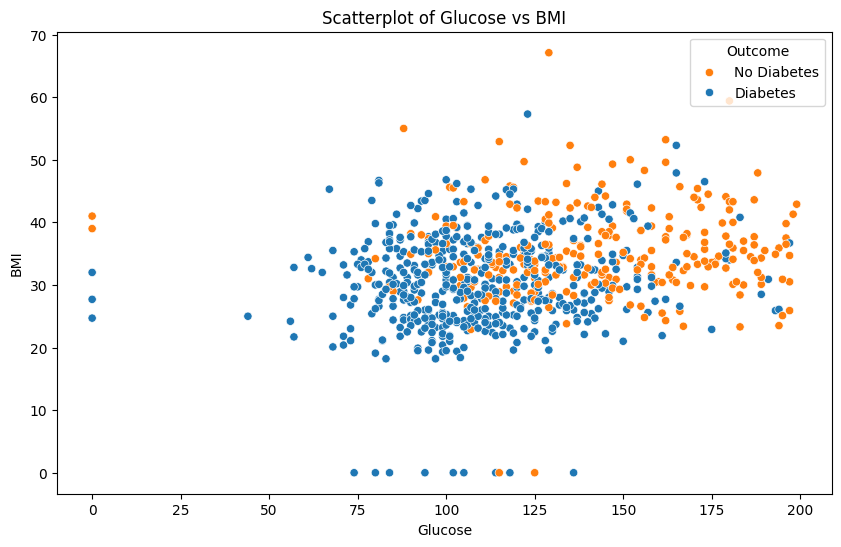

In [16]:
# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Glucose', y='BMI', hue='Outcome')
plt.title('Scatterplot of Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()

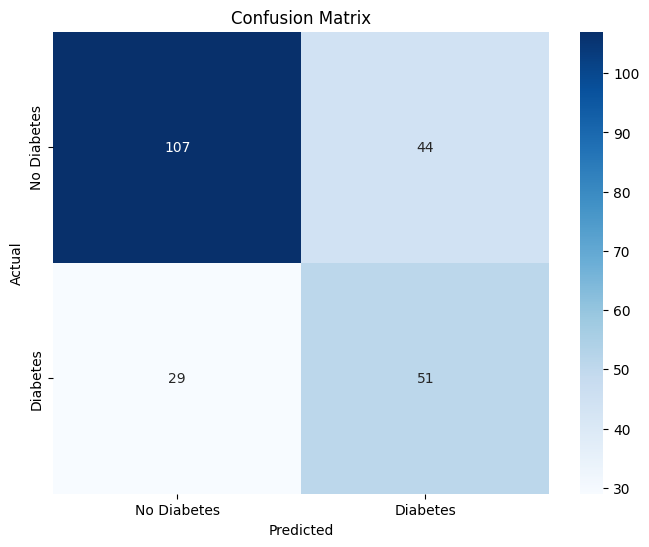

In [ ]:
# Tính toán và vẽ ma trận nhầm lẫn
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()